# Assignment 1 - Decision Trees and Clustering Techniques

## _Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB_

### by Catarina Silva and Marco Simões

---

This assignment will assess the students knowledge on the following Machine Learning topics:

- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 
  - 1.a) Decision Trees (first week) 
  - 1.b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: _06/10/2021_

## Conditions

---

- _Groups:_ two elements of the same PL class
- _Duration:_ 2 weeks
- _Workload:_ 8h per student

## Table of contents

---

- [Assignment 1 - Decision Trees and Clustering Techniques](#assignment-1---decision-trees-and-clustering-techniques)
  - [Conditions](#conditions) 
  - [Table of contents](#table-of-contents)
  - [Project setup](#project-setup)
  - [Group Identification](#group-identification)
  - [Assignment 1-b) Clustering techniques](#assignment-1---b-clustering-techniques)
  - [Exercises](#exercises) 
    - [Ex.1 - Loading Dataset and Ploting Clusters](#ex-1)
    - [Ex.2 - Distance Functions](#ex-2)
    - [Ex.3 - Generating Centroid](#ex-3)
    - [Ex.4 - Labeling Clusters](#ex-4)
    - [Ex.5 - Updating Centroids](#ex-5)
    - [Ex.6 - Ploting Clusters](#ex-6)
    - [Ex.7 - K-means](#ex-7)
    - [Ex.8 - Ploting Cluster Centroids](#ex-8)
    - [Ex.9 - K-means statistic](#ex-9)
    - [Ex.10 - DBSCAN](#ex-10)

## Group Identification 
| Student                                    | Number       |
|------------------------------------------- |------------- |
|[Miguel Rabuge](rabuge@student.dei.uc.pt)   | 2018293728   |
|[Pedro Rodrigues](pedror@student.dei.uc.pt) | 2018283166	  |

# Assignment 1 - b) Clustering techniques

Consider the folowing four datasets:

- `Aggregation`: A. Gionis, H. Mannila, and P. Tsaparas, Clustering aggregation. ACM Transactions on Knowledge Discovery from Data (TKDD), 2007. 1(1): p. 1-30.
- `Compound`: C.T. Zahn, Graph-theoretical methods for detecting and describing gestalt clusters. IEEE Transactions on Computers, 1971. 100(1): p. 68-86.
- `R15`: C.J. Veenman, M.J.T. Reinders, and E. Backer, A maximum variance cluster algorithm. IEEE Trans. Pattern Analysis and Machine Intelligence, 2002. 24(9): p. 1273-1280.
- `Spiral`: H. Chang and D.Y. Yeung, Robust path-based spectral clustering. Pattern Recognition, 2008. 41(1): p. 191-203.

They are composed by matrixes of several rows and three columns: the first two correspond to the xy-coordinates of the point, and the thrid correspond to the index of the cluster they bellong to (ranging from `0` to `nclusters-1`). Each dataset have a different number of rows and clusters.


## Project setup 

---



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path
from sklearn.cluster import DBSCAN

DATA_PATH = "."
FILES = ["Aggregation", "Compound", "R15", "Spiral"]



***
### Ex. 1

Load the datasets into memory and extract, for each dataset, the number of true clusters in the data. You should populate de `datasets` and `nclusters` arrays so they end up with four cells, one for each dataset, with the dataframes (`shape=[nsamples, d=2]` and the number of clusters, respectively. Then, create a figure with four scatter plots showing the spatial distribution of the points in each dataset. You might find useful the following functions: `iloc`, from `pandas`; `subplots`, `scatter` and `set_title` from matplotlib's `pyplot`. The final result should be similar to the following image:


![scatters](cluster_scatters.png)

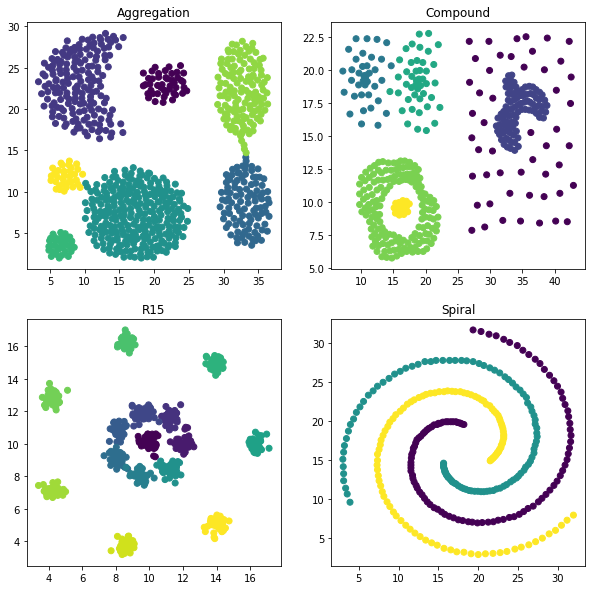

In [4]:
def clusters(files):
    datasets, clusters = [], []
    _, axes = plt.subplots(len(files)//2, len(files) // 2, figsize=[10, 10])
    for n, f in enumerate(files, start=1):
        df = pd.read_csv(f"{path.join(DATA_PATH, f)}.txt",
                         sep="\t", names=["X", "Y", "C"])

        # Load Data
        datasets.append(df.loc[:, ["X", "Y"]])
        clusters.append(df["C"].nunique())
        
        # Plot Data
        plt.subplot(axes.shape[0], axes.shape[1], n, title=f)
        plt.scatter(df["X"], df["Y"], c=df["C"])
    return datasets, clusters


if __name__ == "__main__":
    datasets, nclusters = clusters(FILES)
    
    assert len(nclusters) == 4, "Test Failed!"
    for d in datasets:
        assert d.shape[1] == 2, "Test Failed!"


***
### Ex. 2

Create a function `calc_dist( xi, xj, dist_type )` that, given two feature vectors (`xi` and `xj`) and the `type of distance` metric to use (`dist_type`, with possible values: `euclidean, manhattan, chebychev`), computes and returns the correspondent distance value between the two feature vectors. **NOTE:** You may not resort to third-party predefined distance functions, such as the ones provided by the `scipy.spatial.distance` module. You must compute the distance from the data, using only simple mathematical and algebric functions, such as `sum, sqrt, abs` and so on.

In [5]:

def euclidean(x, y):
    return np.sqrt(sum((x-y)**2))


def manhattan(x, y):
    return sum(abs(x - y))


def chebychev(x, y):
    return max(abs(x - y))


def calc_dist(xi, xj, fn):
    return fn(np.array(xi), np.array(xj))


if __name__ == "__main__":
    x, y = (0, 0), (1, 1)
    assert round(calc_dist(x, y, euclidean), 3) == 1.414, "Test Failed!"
    assert calc_dist(x, y, manhattan) == 2, "Test Failed!"
    assert calc_dist(x, y, chebychev) == 1, "Test Failed!"


***
### Ex. 3
Create a function `gen_random_centroids( n, min_coords, max_coors )` that generates `n` random points within the coordinate limits provided in the arrays `min_coords` and `max_coords` (both of `shape = [1,d]`, with `d` being the number of coordinates of each point - in our datasets, `d=2`). The function must output a matrix of shape `[n, d]`, where each row contains the coordinates of a centroid.

In [6]:
def gen_random_centroids(n, min_coords, max_coords):
    return np.array([[np.random.uniform(i, j) for i, j in zip(min_coords, max_coords)] for _ in range(n)])

In [7]:
# example
print(gen_random_centroids(3, [2, -3], [12, 5]))

# Example Output: 
# - Since the values are random, your output might/should be different. Only the shape should be the same. 
# - Notice the values are within the range limits provides by argument to the function.

'''
[[10.93543569  3.45456041]
 [11.6848827   3.90977382]
 [ 5.15555478 -1.78510517]]
''';

[[ 9.28871441 -1.3837784 ]
 [11.43336363 -0.59334703]
 [ 4.18060685  0.12639892]]


***
### Ex. 4
Create a function `label_data( data, centroids, dist_type='euclidean' )` that attributes a cluster label for each data record based on its distance to the centroids. The `data` shape is `[n_samples, d]`and the `centroids` shape is `[n, d]`. You should output an array of shape `[n_samples, 1]` with values ranging between `0` and `n-1`, corresponding to the index of the closest `centroid` for each data record. Please consider different types of distance metrics, making use of the function developed in **Ex. 2**.

In [8]:
def label_data(data, centroids, fn=euclidean):
    return np.array([[np.argmin([calc_dist(p, c, fn=fn) for c in centroids])] for p in data.itertuples(index=False)])

In [9]:
# example
ex_data = pd.DataFrame(
    np.array([[0, 0], [1, 0], [2, 0], [1, 0], [1, 1], [1, 2]]))
ex_centroids = np.array([[0.2, 0.2], [1.6, 0.6], [5.0, 5.0]])
ex_distance = euclidean

ex_labels = label_data(ex_data, ex_centroids, ex_distance)
print(ex_labels)

# expected result
'''
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]]
''';


[[0]
 [0]
 [1]
 [0]
 [1]
 [1]]


***
### Ex. 5

Create a function `update_centroids( data, labels, centroids )` that updates the centroids coordinates based on the mass center of the data records associated with him. If a centroid has no record associated to him, its value must remain unchanged.

In [10]:
def update_centroids(data, labels, centroids):
    updated = []
    for i, c in enumerate(centroids):
        points = []
        for j, p in enumerate(data.itertuples(index=False)):
            if labels[j] == i:
                points.append(np.array(p))
        updated.append(sum(points) / len(points) if points else c)
    return np.array(updated)

In [11]:
# example
ex_data = pd.DataFrame(
    np.array([[0, 0], [1, 0], [2, 0], [1, 0], [1, 1], [1, 2]]))
ex_labels = np.array([[0], [0], [1], [0], [1], [1]])
ex_centroids = np.array([[0.2, 0.2], [1.6, 0.6], [5.0, 5.0]])

new_centroids = update_centroids(ex_data, ex_labels, ex_centroids)

print(new_centroids)

# expected result
'''
[[0.66666667 0.        ]
 [1.33333333 1.        ]
 [5.         5.        ]]
''';


[[0.66666667 0.        ]
 [1.33333333 1.        ]
 [5.         5.        ]]


***
### Ex. 6

Create a function `plot_clusters( data, labels, centroids=None )` that plots a _scatter plot_ of the data, coloring the points of each cluster with a different color, and marking the centroids, if provided.

In [12]:
def plot_clusters(data, labels, centroids=None):
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)

    if centroids is not None:
        df = pd.DataFrame(centroids, columns=["X", "Y"])
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="red",label="Centroids")
        plt.legend()


***
### Ex. 7

Create a function `kmeans( data, n, dist_type='euclidean' )` that, given a dataset with shape `[n_samples, d]`, clusters the data into `n` sets using the `k-means` algorithm. Make use of the functions you developed previously; you cannot resort to `sklearn` nor other implementations. The function should return the final labels, the final centroid coordinates and the number of iterations run.

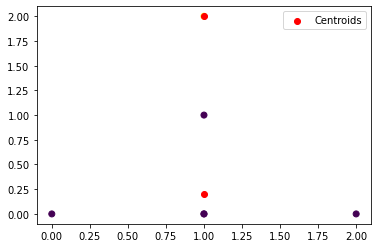

In [17]:
def random_centroids(n, data):
    minimum, maximum = [], []
    for d in range(data.shape[1]):
        minimum.append(min(data.iloc[:, d]))
        maximum.append(max(data.iloc[:, d]))
    return gen_random_centroids(n, minimum, maximum)


def kmeans(data, n, dist_function=euclidean, max_iter=20):
    old = np.empty((data.shape[0], 1))
    new = np.random.randint(n, size=(data.shape[0], 1))
    centroids = random_centroids(n, data)

    i = 0
    while i < max_iter and (old != new).any():
        old, new = new, label_data(data, centroids, fn=dist_function)
        centroids = update_centroids(data, new, centroids)
        i += 1
    return new, centroids, i


new_labels, centroids, i = kmeans(ex_data, 2)
plot_clusters(ex_data, new_labels, centroids)


***
### Ex. 8

The code bellow generates 3 figures with with the final result of applying the `kmeans` function to the data using the three different types of distance (`euclidean`, `manhattan` and `chebychev`). Did the distance type influence the results?

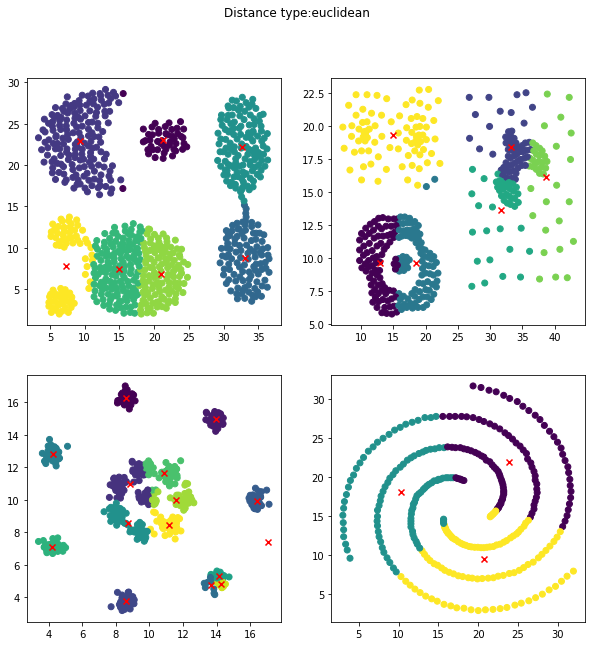

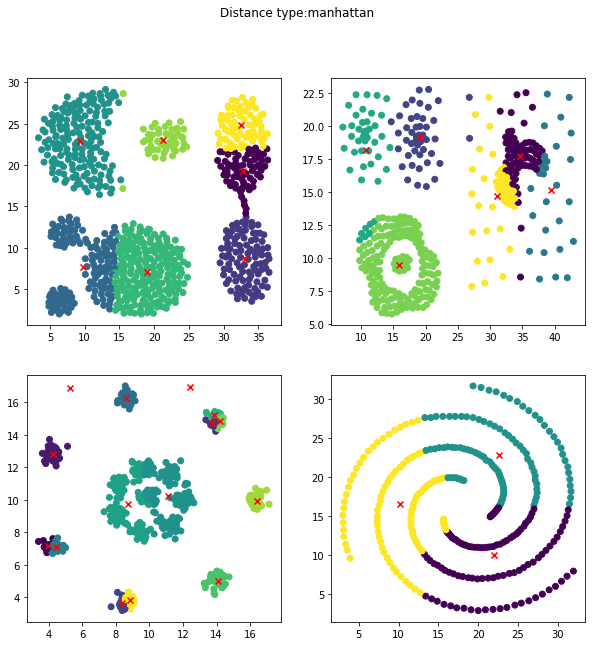

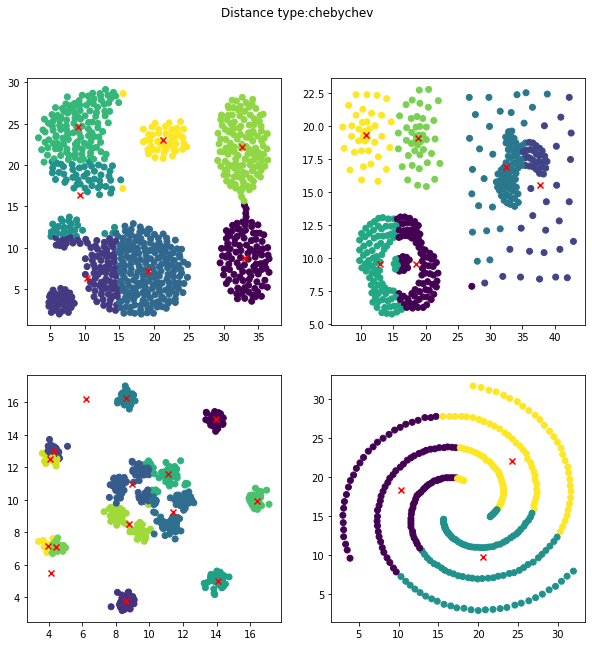

In [14]:
for df in [euclidean, manhattan, chebychev]:

    fig, axes = plt.subplots(2, 2, figsize=[10, 10])
    fig.suptitle(f"Distance type:{df.__name__}")

    axs = axes.flatten()

    for ds in range(len(datasets)):
        labels, centroids, it = kmeans(datasets[ds], nclusters[ds], df)
        axs[ds].scatter(datasets[ds].iloc[:, 0],
                        datasets[ds].iloc[:, 1], c=labels)
        axs[ds].scatter(centroids[:, 0], centroids[:, 1],
                        marker='x', color='r')


**Answer:**

Yes, it did, as we can see from the plots above. As different methods for evaluation the distance between two 
points result in different placements of the centroids, indirectly, although the differences may be subtle!

***
### Ex. 9

Run the `kmeans` function 10 times with each distance type (in each dataset). Compute report the average and standard deviation of the number of iterations taken by the algorithm. Comment your results.

In [15]:
def k_loop(datasets, clusters, n=10):
    for i, (d, c) in enumerate(zip(datasets, clusters)):
        print(f"Dataset: {FILES[i]}")
        for df in [euclidean, manhattan, chebychev]:
            print(f" Distance Function: {df.__name__}")
            iter = [kmeans(d, c, dist_function=df, max_iter=100)[2]
                    for _ in range(n)]
            print(f"   => Mean : {np.mean(iter)}")
            print(f"   => Stdev: {np.std(iter)}")

if __name__ == "__main__":
    k_loop(datasets, nclusters)


Dataset: Aggregation
 Distance Function: euclidean


KeyboardInterrupt: 


**Answer:**

- Running k-means with max_iter=10, and analysing the iteration mean and standard deviation:

    - In the "Aggregation" dataset, seems that the euclidean distance, on average, had more average iterations than the other 2, since the standard deviation is similar.
    - In the "Compound" dataset, they all had similar results, except the chebychev distance.
    - In the "R15" dataset, the euclidean distance has lesser iterations by far.
    - In the "Spiral" dataset, the chebychev has the lower iterations mean and standard deviation, while the euclidean has the higher values of the three.

***
### Ex 10

Use the `DBSCAN` method from the `sklearn.cluster` module to cluster de data. Try different values of `eps` and `min_samples`. Visualize the results making use of the function developed `plot_clusters` developed in **Ex. 6**. Discuss the following points:
1. In what way does the `eps` value influence the result of the algorithm? Does the same value work well for all datasets or it should be tuned for each dataset?
2. In what way does the `min_samples` value influence the result of the algorithm? Does the same value work well for all datasets or it should be tuned for each dataset?
3. Comment the differences in the results obtained by `DBSCAN` and `kmeans`.

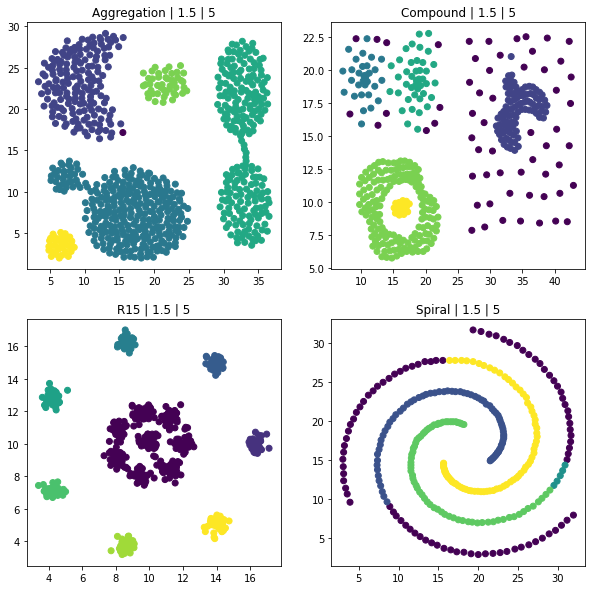

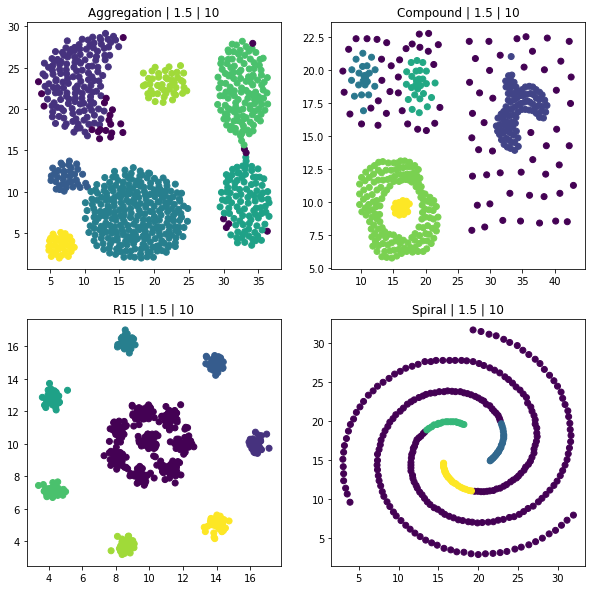

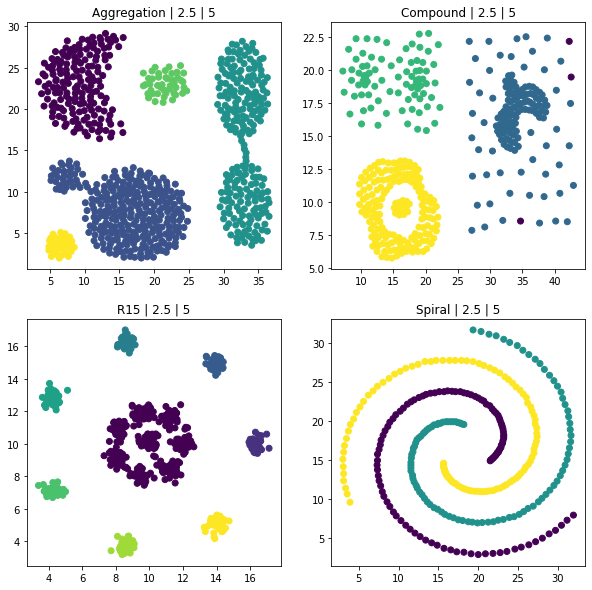

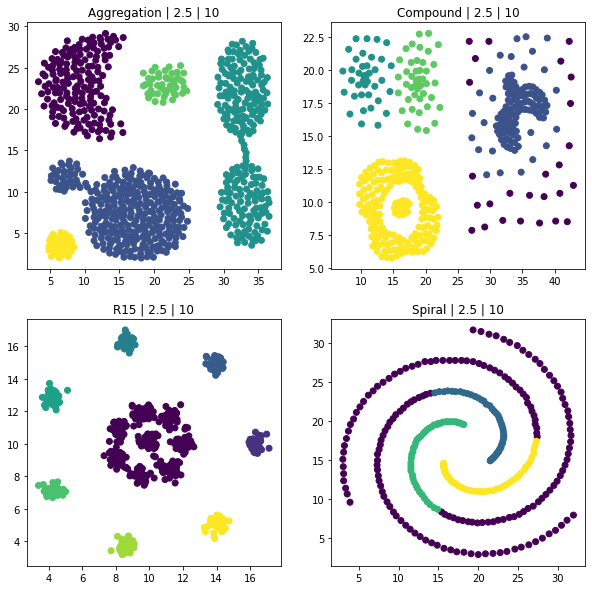

In [ ]:
def db_loop(datasets, eps, samples):
    for e in eps:
        for ms in samples:
            _, axes = plt.subplots(len(datasets) // 2, len(datasets) // 2, figsize=(10, 10))
            for i, dataset in enumerate(datasets):
                plt.subplot(axes.shape[0], axes.shape[1], i + 1,
                            title=f"{FILES[i]} | {e} | {ms}")
                clustering = DBSCAN(eps=e, min_samples=ms).fit(dataset)
                plot_clusters(dataset, clustering.labels_)

if __name__ == "__main__":
    db_loop(datasets, (1.5, 2.5), (5, 10))

**Answers:**

1. The "eps" parameter defines the maximum distance between 2 samples for one to be considered in the neighborhood of the other. Therefore, by increasing the eps parameter we usually get bigger clusters, lower cluster count and less noise points. The same value does not work for all the datasets, since each one has their own properties, ranging from nested clusters to well-defined small clusters. This properties have to be taken into consideration when defining the eps parameter value

2. The "min_sample" parameter defines how much points have to be in "eps" distance to a point for it to be considered
   a core point, including the point itself. Hence, increasing this parameter will cause more noise points, but will cause clusters to be more stable. As answered above, the tunning of this parameter highly depends on the dataset properties. For this reason, the same applies to the "min_sample" attribute

3. By observating the plots, we can tell that:
   - The k-means clusters follow a certain spherical shape, while the DBSCAN's clusters do not.
   - The k-means is dependent on the given centroid number, as well as their position, while the DBSCAN is not.
   - The DBSCAN can treat outliers more efficiently than the k-means.
   - The DBSCAN has more parameters to tune than the k-means (eps and min_sample vs centroid number).
